In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis\\notebooks and experiments'

In [3]:
os.chdir('../')

In [4]:
pwd

'c:\\Users\\sjasm\\Documents\\EV_data_analysis'

In [50]:
df_orig = pd.read_csv('datasets/Car details v3.csv')

In [51]:
df_orig.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine (CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [52]:
df_orig.shape

(8128, 13)

### Basic Insights and Preprocessing

In [53]:
df_orig.isnull().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine (CC)       221
max_power(bhp)    222
torque            222
seats             221
dtype: int64

In [54]:
df = df_orig.drop(['mileage', 'owner', 'torque', 'seller_type', 'year'],axis=1)

In [55]:
df.head()

,name,selling_price,km_driven,fuel,transmission,engine (CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Manual,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Manual,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Manual,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Manual,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Manual,1298.0,88.20,5.0


In [56]:
df.dropna(inplace=True)

In [57]:
df.isnull().sum()

name              0
selling_price     0
km_driven         0
fuel              0
transmission      0
engine (CC)       0
max_power(bhp)    0
seats             0
dtype: int64

In [58]:
df.dtypes

name               object
selling_price       int64
km_driven           int64
fuel               object
transmission       object
engine (CC)       float64
max_power(bhp)    float64
seats             float64
dtype: object

In [59]:
df.describe()

,selling_price,km_driven,engine (CC),max_power(bhp),seats
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,1458.708829,91.587378,5.416393
std,8.135827e+05,5.679230e+04,503.893057,35.747218,0.959208
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000
75%,6.900000e+05,9.542500e+04,1582.000000,102.000000,5.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7906 non-null   object 
 1   selling_price   7906 non-null   int64  
 2   km_driven       7906 non-null   int64  
 3   fuel            7906 non-null   object 
 4   transmission    7906 non-null   object 
 5   engine (CC)     7906 non-null   float64
 6   max_power(bhp)  7906 non-null   float64
 7   seats           7906 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 555.9+ KB


In [61]:
df.shape

(7906, 8)

In [62]:
##dummies for categorical data
df_fuel_encoded = pd.get_dummies(df['fuel'])

In [63]:
#x  = lambda a: 1 if a else 0

In [64]:
df_fuel_encoded.head()
#df_fuel_encoded = df_fuel_encoded.applymap(x)

,CNG,Diesel,LPG,Petrol
0,False,True,False,False
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,False,False,True


In [65]:
df_transmission_encoded =  pd.get_dummies(df['transmission'])

In [66]:
#df_transmission_encoded = df_transmission_encoded.applymap(x).head()

In [67]:
df_processed = pd.concat([df, df_fuel_encoded, df_transmission_encoded], axis=1)

In [68]:
#df_processed.drop(['fuel', 'transmission', 'seats'],axis=1, inplace=True)

In [69]:
df_processed.head()

,name,selling_price,km_driven,fuel,transmission,engine (CC),max_power(bhp),seats,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Manual,1248.0,74.00,5.0,False,True,False,False,False,True
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Manual,1498.0,103.52,5.0,False,True,False,False,False,True
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Manual,1497.0,78.00,5.0,False,False,False,True,False,True
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Manual,1396.0,90.00,5.0,False,True,False,False,False,True
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Manual,1298.0,88.20,5.0,False,False,False,True,False,True


In [70]:
df_processed.describe()

,selling_price,km_driven,engine (CC),max_power(bhp),seats
count,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000
mean,6.498137e+05,6.918866e+04,1458.708829,91.587378,5.416393
std,8.135827e+05,5.679230e+04,503.893057,35.747218,0.959208
min,2.999900e+04,1.000000e+00,624.000000,32.800000,2.000000
25%,2.700000e+05,3.500000e+04,1197.000000,68.050000,5.000000
50%,4.500000e+05,6.000000e+04,1248.000000,82.000000,5.000000
75%,6.900000e+05,9.542500e+04,1582.000000,102.000000,5.000000
max,1.000000e+07,2.360457e+06,3604.000000,400.000000,14.000000


In [71]:
df_processed.shape

(7906, 14)

### Descriptive Statistics

Boxplot for selling price

<Axes: xlabel='selling_price'>

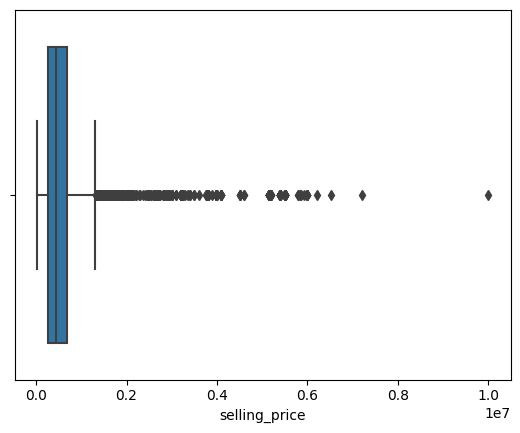

In [72]:
sns.boxplot(x = 'selling_price', data = df_processed)

In [73]:
df_processed = df_processed[df_processed['selling_price'] != df_processed['selling_price'].max()]

In [74]:
df['selling_price'].max()

10000000

In [75]:
df_processed = df_processed[df_processed['selling_price'] != df_processed['selling_price'].max()]

In [76]:
df['selling_price'].max()

10000000

<Axes: xlabel='selling_price'>

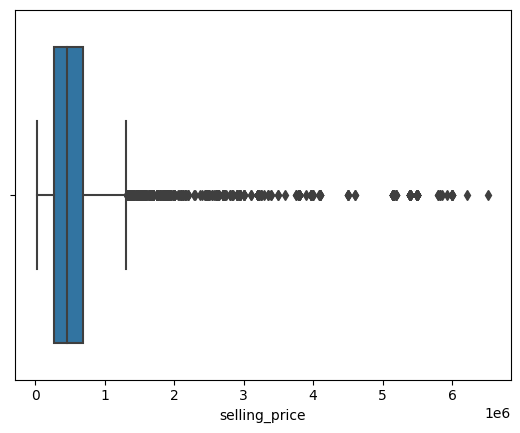

In [77]:
sns.boxplot(x = 'selling_price', data = df_processed)

Scatter plot b/w selling price and kms driven

Univariate Analysis:

C:\Users\sjasm\AppData\Local\Temp\ipykernel_2828\219638071.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_processed[column], ax = ax)
C:\Users\sjasm\AppData\Local\Temp\ipykernel_2828\219638071.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_processed[column], ax = ax)
C:\Users\sja

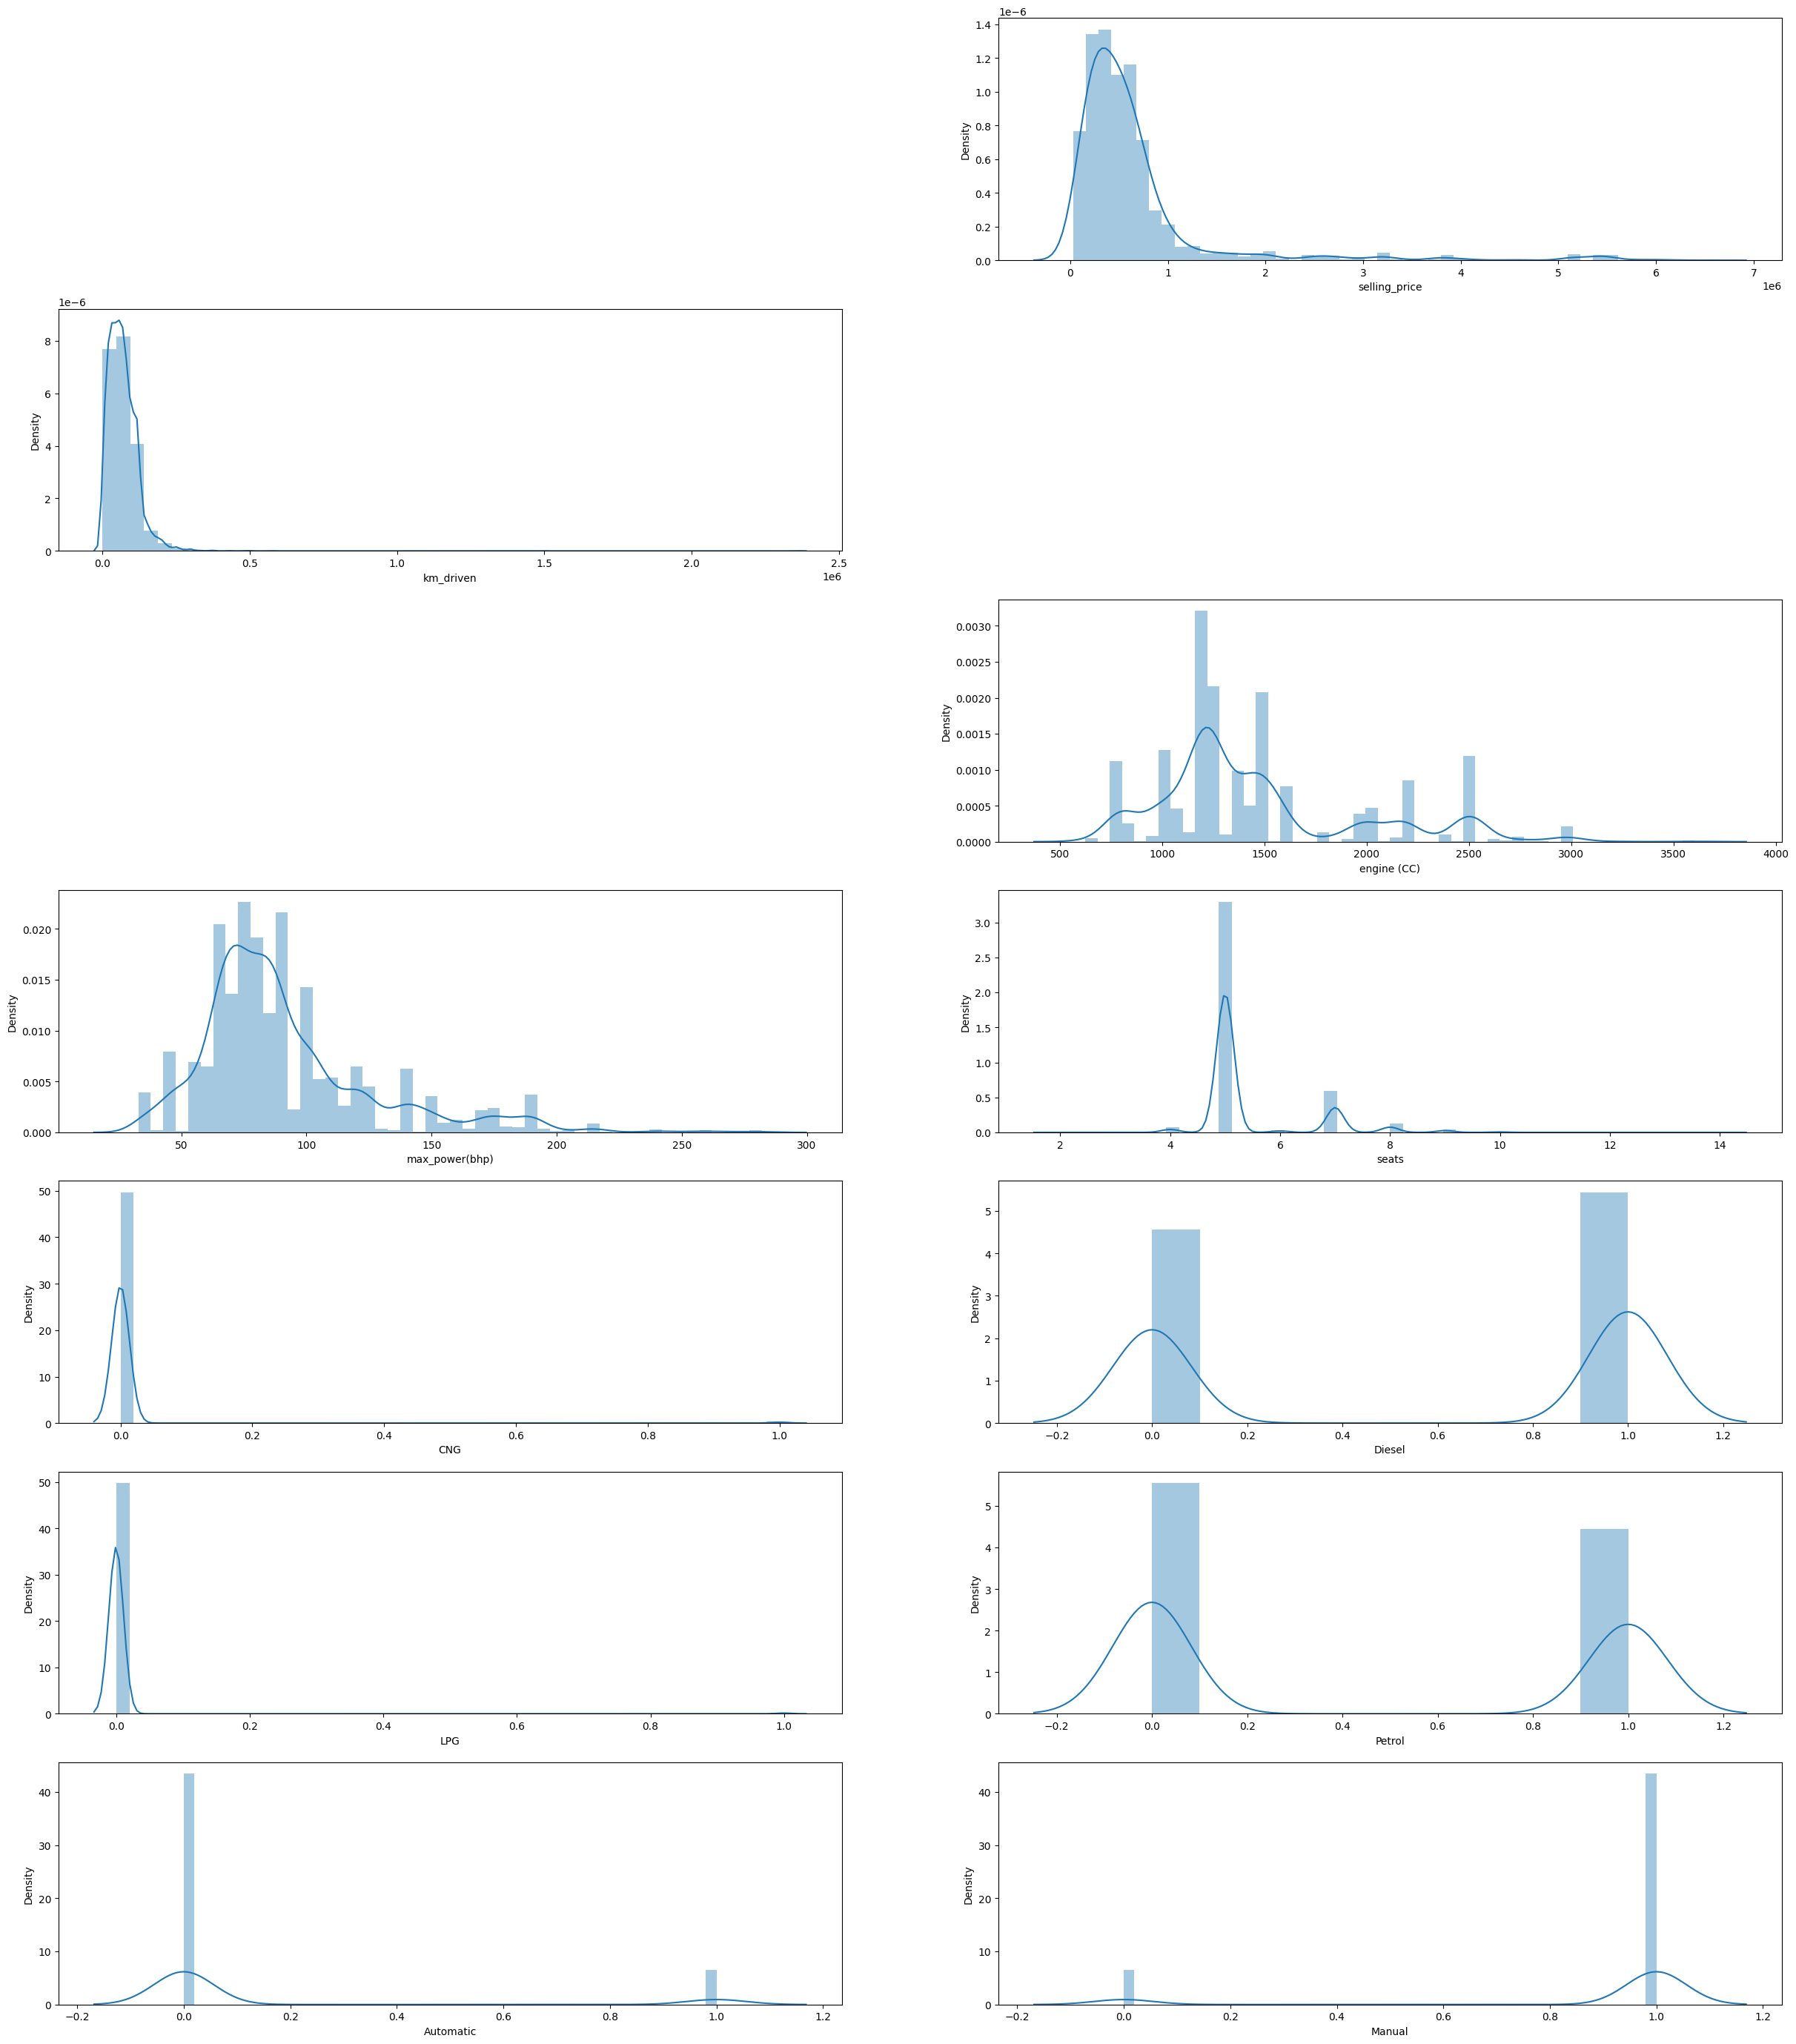

In [78]:
plt.figure(figsize=(30,45))

for i, column in enumerate(df_processed.columns):
    if df_processed[column].dtype!= 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.distplot(df_processed[column], ax = ax)
        plt.xlabel(column)
plt.show()

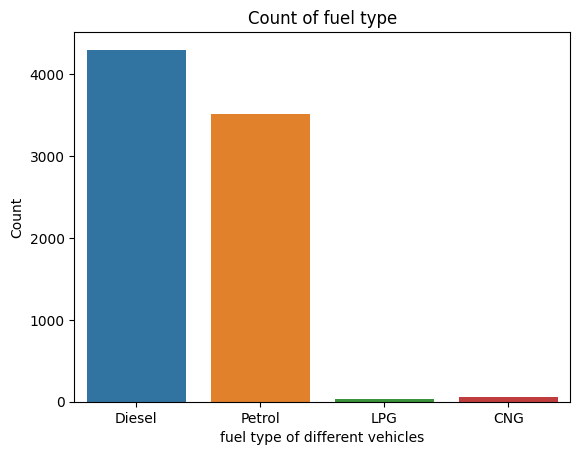

In [79]:
sns.countplot(data=df_processed, x='fuel')
plt.xlabel('fuel type of different vehicles')
plt.ylabel('Count')
plt.title('Count of fuel type')
plt.show()

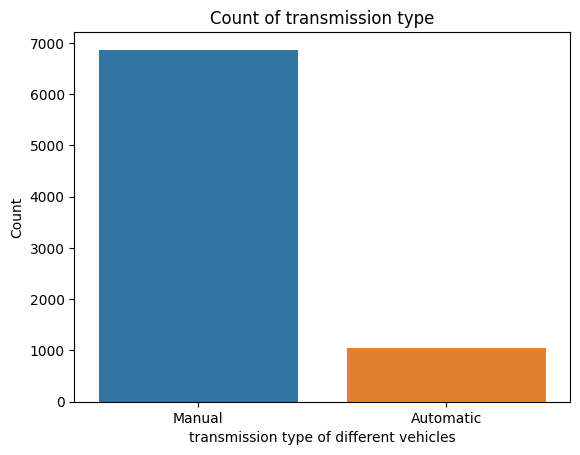

In [80]:
sns.countplot(data=df_processed, x='transmission')
plt.xlabel('transmission type of different vehicles')
plt.ylabel('Count')
plt.title('Count of transmission type')
plt.show()

In [81]:
## bins for selling price
import numpy as np

bins = np.linspace(min(df_processed['selling_price']), max(df_processed['selling_price']), 5)
group_names = [f'{bins[0]}:{bins[1]}', f'{bins[1]}:{bins[2]}', f'{bins[2]}:{bins[3]}', f'{bins[3]}:{bins[4]}']
df_processed['prices_binned'] = pd.cut(df['selling_price'], bins, labels=group_names, include_lowest= True)

Bivariate Ananlysis:

C:\Users\sjasm\AppData\Local\Temp\ipykernel_2828\2008147237.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True, color='blue')
C:\Users\sjasm\AppData\Local\Temp\ipykernel_2828\2008147237.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True, color='red')


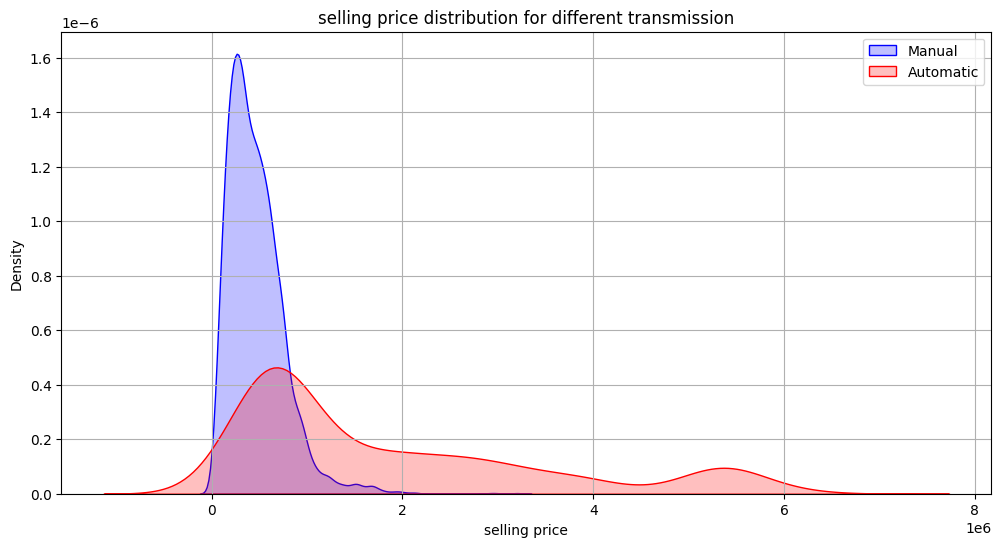

In [83]:
plt.figure(figsize=(12, 6)) #multivariate analysis
sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Manual']['selling_price'], label='Manual', shade=True, color='blue')
sns.kdeplot(data=df_processed[df_processed['transmission'] == 'Automatic']['selling_price'], label='Automatic', shade=True, color='red')
plt.xlabel('selling price')
plt.ylabel('Density')
plt.title('selling price distribution for different transmission')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
df_corr = df_processed.drop(['seats', 'transmission', 'fuel', 'prices_binned'],axis=1)

In [90]:
df_corr.iloc[:,1:].corr()['selling_price'].sort_values()

Manual           -0.591825
km_driven        -0.222821
Petrol           -0.198296
LPG              -0.036268
CNG              -0.033415
Diesel            0.208120
engine (CC)       0.457132
Automatic         0.591825
max_power(bhp)    0.746120
selling_price     1.000000
Name: selling_price, dtype: float64

Text(0, 0.5, 'selling price')

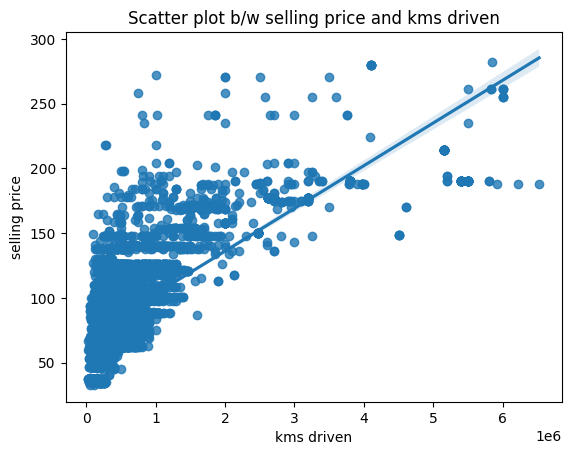

In [89]:
sns.regplot(x = 'selling_price', y= 'max_power(bhp)', data = df_processed)
plt.title('Scatter plot b/w selling price and kms driven')
plt.xlabel('kms driven')
plt.ylabel('selling price')

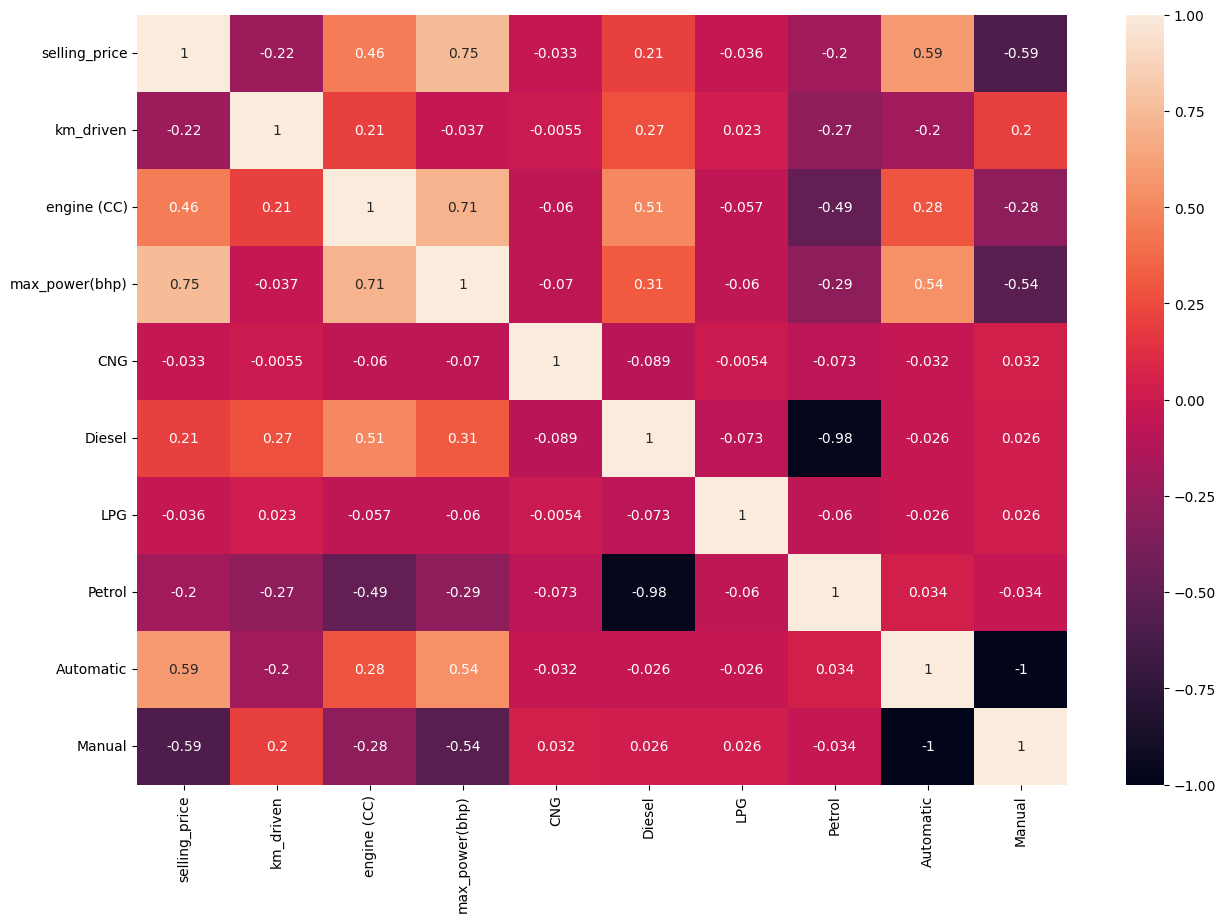

In [85]:
#correlation heatmap - multivariate analysis

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.iloc[:,1:].corr(), annot=True)
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralBiclustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

In [92]:
std_scaler = StandardScaler()

In [94]:
df_seg = df_corr.iloc[:,1:]

In [96]:
df_seg.head(3)

,selling_price,km_driven,engine (CC),max_power(bhp),CNG,Diesel,LPG,Petrol,Automatic,Manual
0,450000,145500,1248.0,74.00,False,True,False,False,False,True
1,370000,120000,1498.0,103.52,False,True,False,False,False,True
2,158000,140000,1497.0,78.00,False,False,False,True,False,True


In [97]:
df_scaled = std_scaler.fit_transform(df_seg)

In [98]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.246196,1.343526,-0.417894,-0.493324,-0.081379,0.915967,-0.066692,-0.895828,-0.389034,0.389034
1,-0.345768,0.894500,0.078535,0.337589,-0.081379,0.915967,-0.066692,-0.895828,-0.389034,0.389034
2,-0.609635,1.246677,0.076549,-0.380734,-0.081379,-1.091743,-0.066692,1.116285,-0.389034,0.389034
3,-0.526243,1.017762,-0.124008,-0.042965,-0.081379,0.915967,-0.066692,-0.895828,-0.389034,0.389034
4,-0.644486,0.894500,-0.318609,-0.093630,-0.081379,-1.091743,-0.066692,1.116285,-0.389034,0.389034


### Performing KMeans Clustering without PCA (for Segementation)

c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sjasm\anaconda3\envs\fastfoodenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

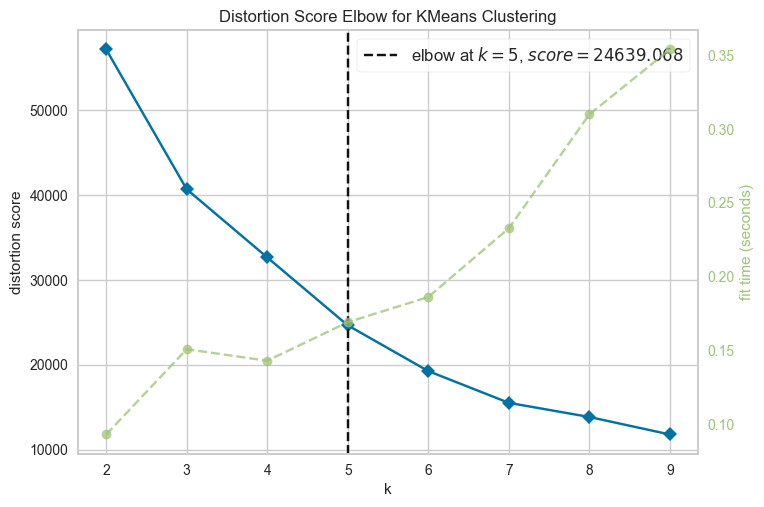

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
#elbow method for k value
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,10)).fit(df_scaled)
visualizer.show()

In [116]:
kmeans = KMeans(n_clusters=)
kmeans_labels = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = kmeans_labels

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

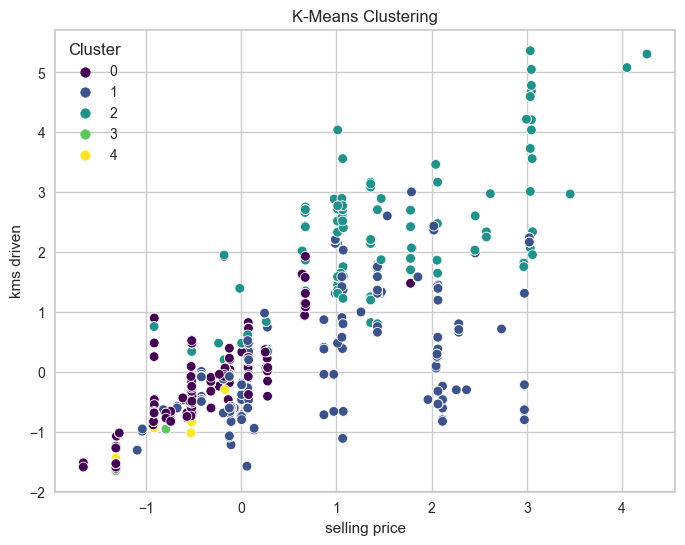

In [113]:
##choosing two features for scatter plot visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[2], y=df_scaled[3], hue='Cluster', data=df_scaled, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('selling price')
plt.ylabel('kms driven')
plt.show()

<Axes: xlabel='Cluster', ylabel='count'>

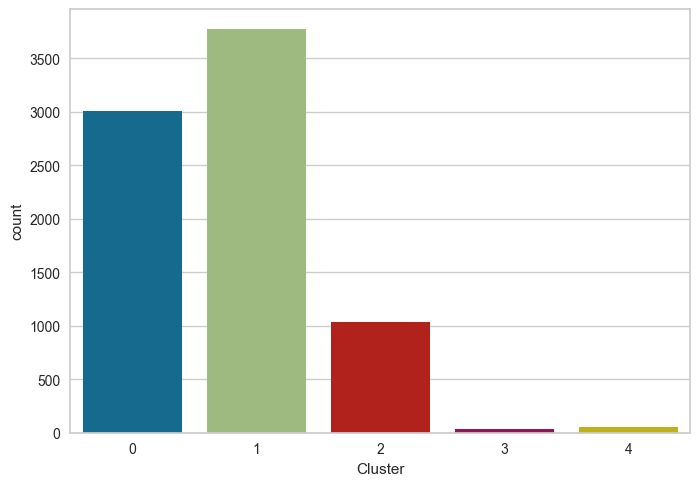

In [115]:
sns.countplot(x = 'Cluster', data = df_scaled)